## Détection des valeurs aberrantes (outliers)

**a. Méthode des boîtes à moustaches (IQR)**

In [93]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

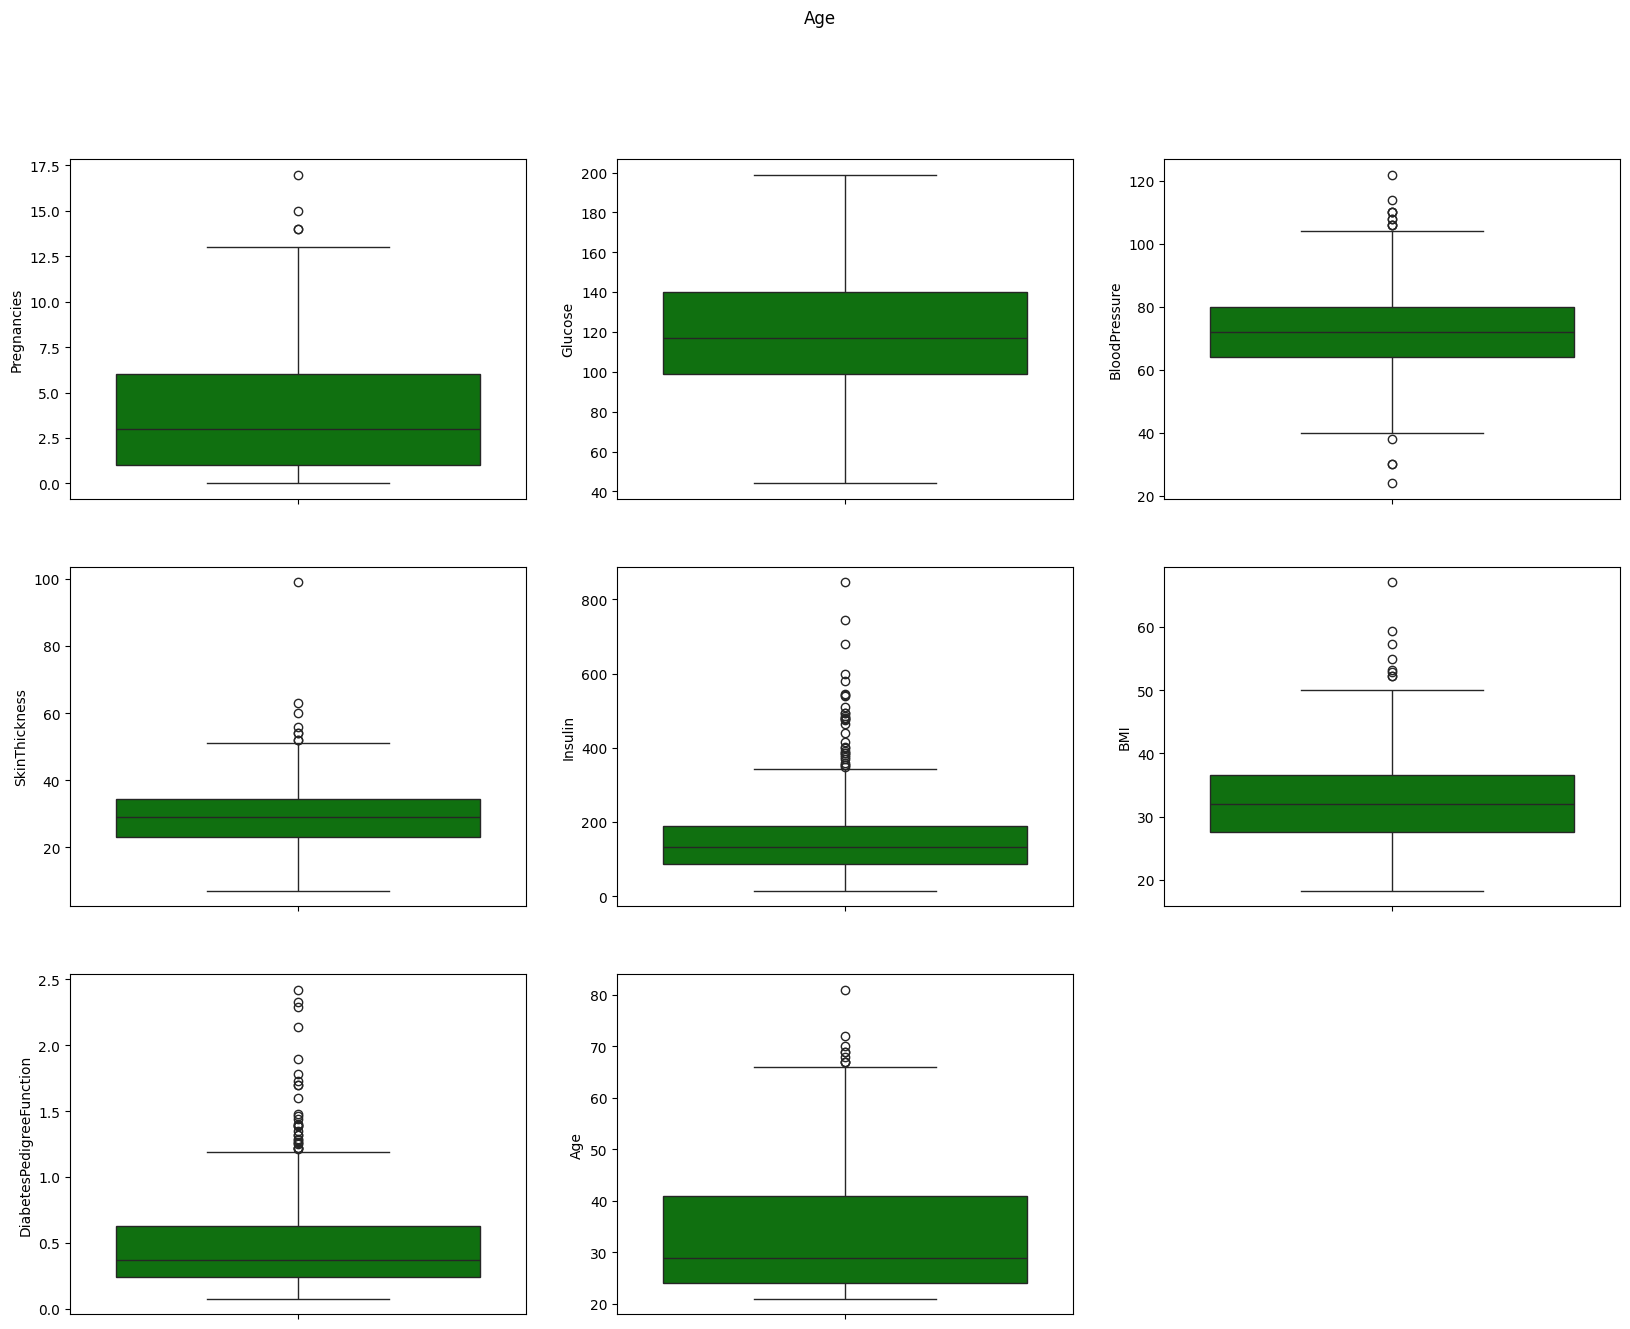

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     5
BMI                         0
DiabetesPedigreeFunction    4
Age                         0
dtype: int64


In [107]:
df=pd.read_csv("../data/raw/dataset_diabete_imputed.csv")

plt.figure(figsize=(20,15))
for i ,c in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[c],color="green")
    plt.suptitle(c)
plt.show()


Q1=df[df.columns].quantile(0.1)
Q3=df[df.columns].quantile(0.9)
IQR=Q3-Q1
borne_max=Q3+1.5*IQR
borne_min=Q1-1.5*IQR
outliers=(df[df.columns]>borne_max)|(df[df.columns]<borne_min)
print(outliers.sum())



**Remarque :** sauf pour Glucose, toutes les autres colonnes contiennent des outliers.

c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       1.791759    148.0       4.276666       3.555348  5.197707  3.514526   
1       0.000000     85.0       4.189655       3.367296  4.040542  3.280911   
2       2.079442    183.0       4.158883       3.295837  5.141664  3.148453   
3       0.000000     89.0       4.189655       3.135494  4.543295  3.335770   
4           -inf    137.0       3.688879       3.555348  5.123964  3.763523   
..           ...      ...            ...            ...       ...       ...   
763     2.302585    101.0       4.330733       3.871201  5.192957  3.493473   
764     0.693147    122.0       4.248495       3.295837  5.098123  3.605498   
765     1.609438    121.0       4.276666       3.135494  4.718499  3.265759   
766     0.000000    126.0       4.094345       3.522150  4.937552  3.404525   
767     0.000000     93.0       4.248495       3.433987  4.449351  3.414443   

     DiabetesPedigreeFunction       Age  
0        

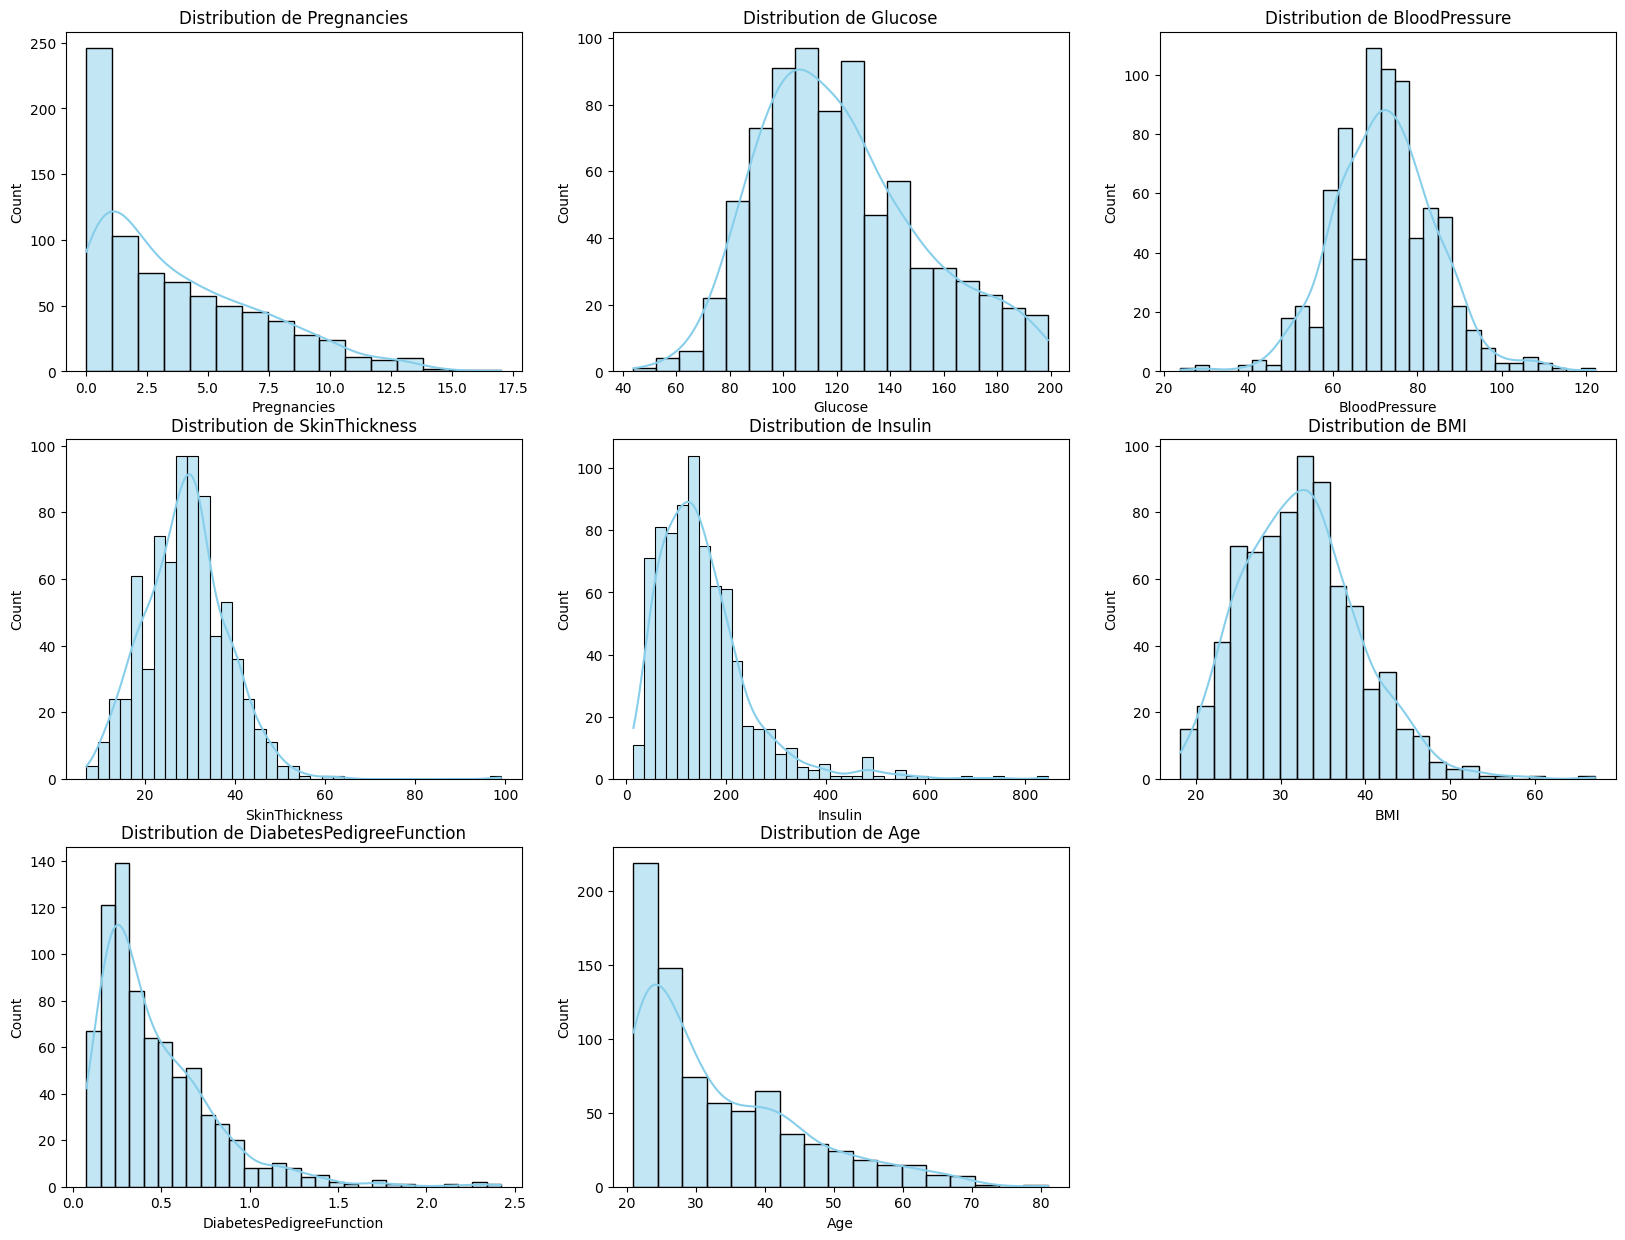

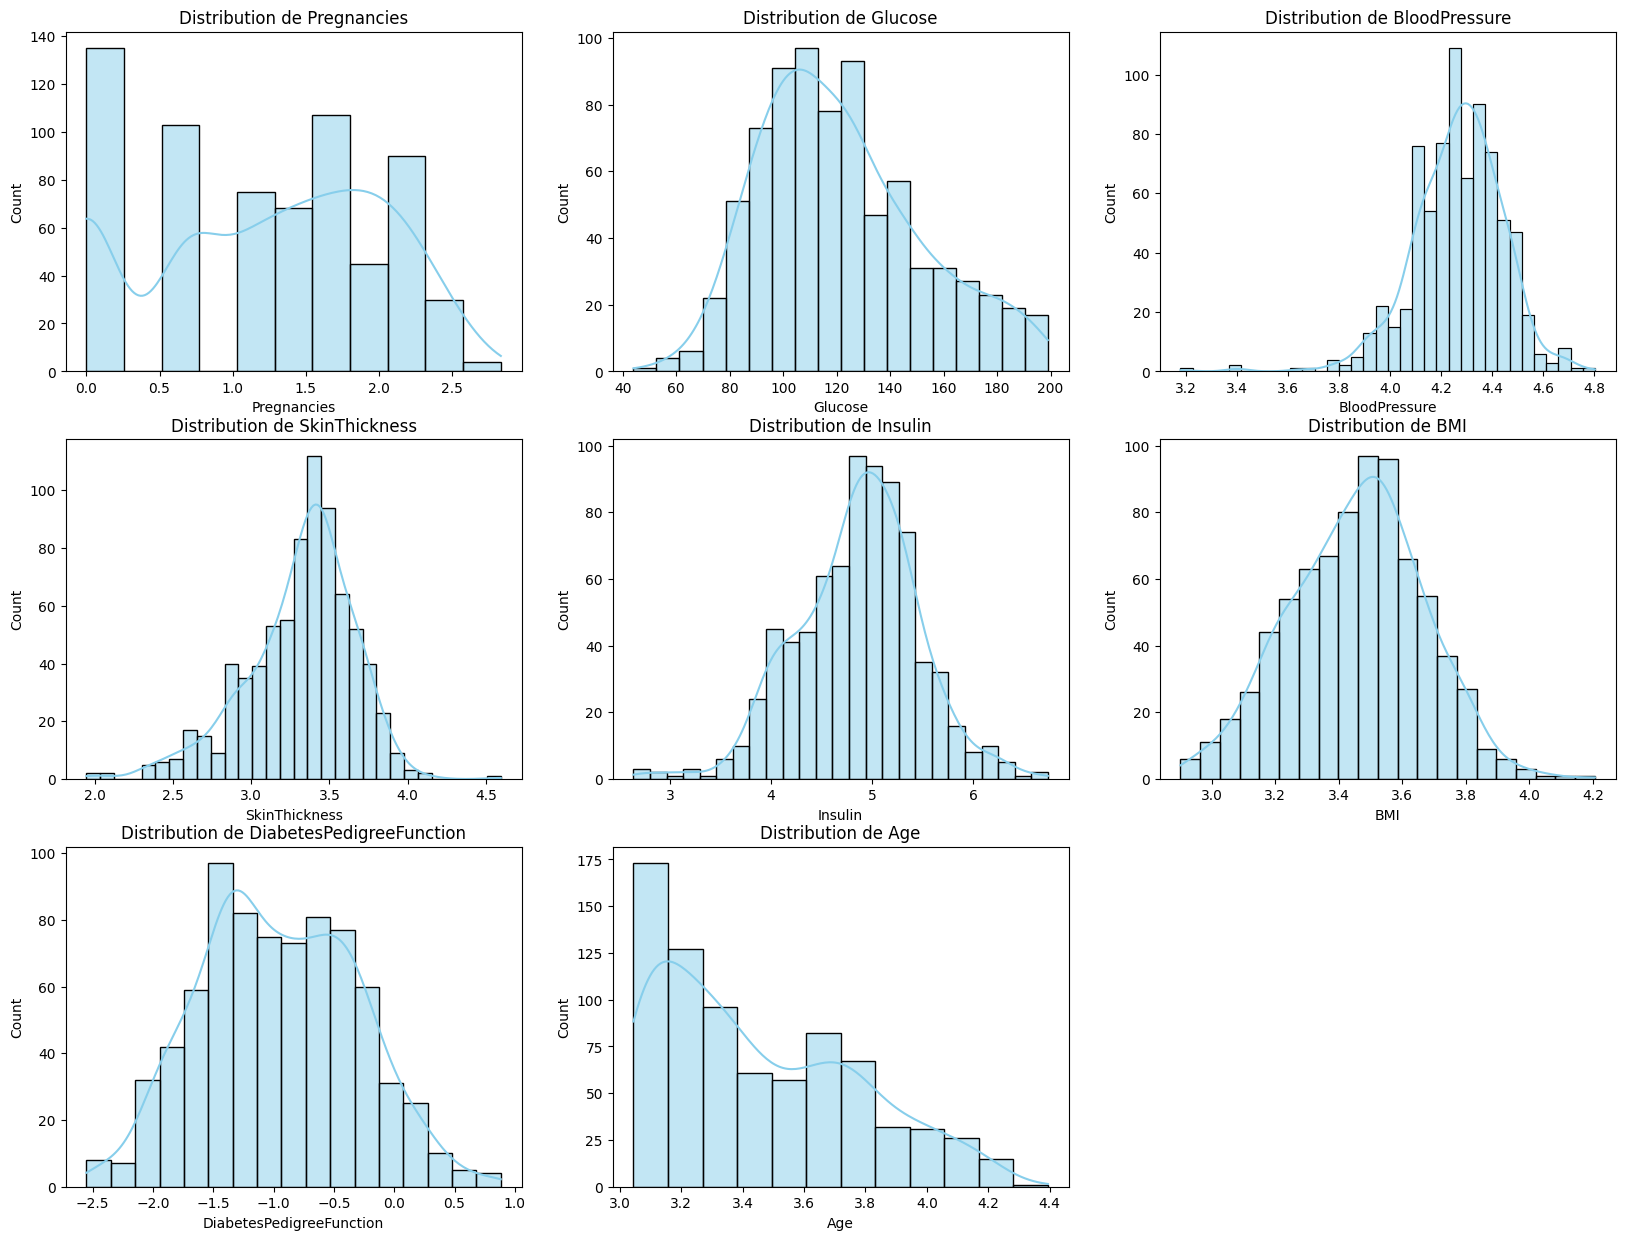

 Transformation logarithmique appliquée sur les variables continues.


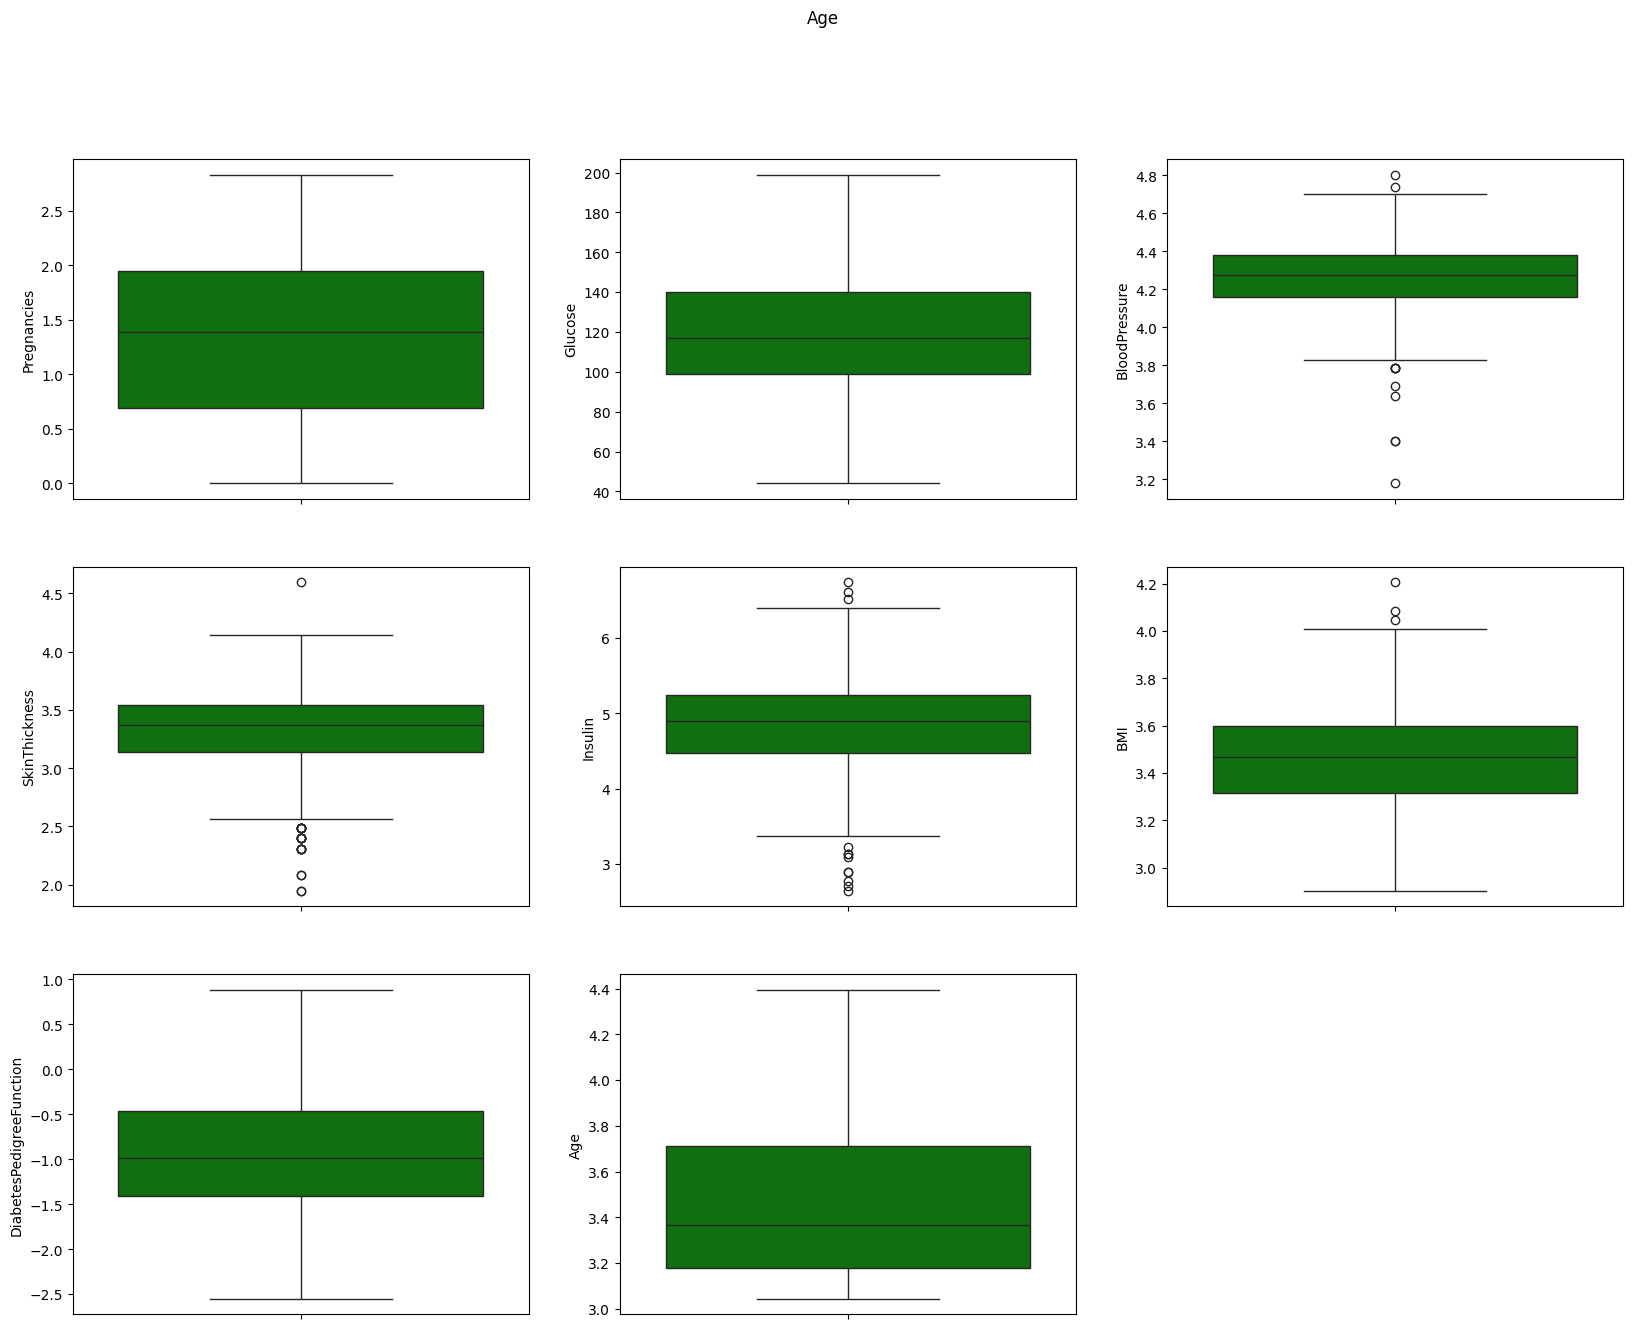

Pregnancies                 111
Glucose                       0
BloodPressure                 3
SkinThickness                 2
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [ ]:




df_log = df.copy()
for col in ["DiabetesPedigreeFunction", "Insulin", "BMI","BloodPressure","SkinThickness","Pregnancies","Age"]:  
    df_log[col] = np.log(df[col])  

print(df_log)


plt.figure(figsize=(20,15))

for i, col in enumerate(df.columns, 1):  
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution de {col}")
plt.show()



plt.figure(figsize=(20,15))

for i, col in enumerate(df_log.columns, 1):  
    plt.subplot(3, 3, i)  
    sns.histplot(df_log[col], kde=True, color='skyblue')
    plt.title(f"Distribution de {col}")
plt.show()



print(" Transformation logarithmique appliquée sur les variables continues.")
plt.figure(figsize=(20,15))
for i ,c in enumerate(df_log.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_log[c],color="green")
    plt.suptitle(c)
plt.show()

df.describe(percentiles=[.1, .25, .5, .75, .95])




df_log.to_csv("../data/processed/diabetes_data_cleaned.csv", index=False)

